In [1]:
%matplotlib inline

In [2]:
import os, sys
sys.path.append(os.path.abspath('../../main/python'))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from thalesians.tsa.distrs import NormalDistr as N
import thalesians.tsa.filtering as filtering
import thalesians.tsa.filtering.kalman as kalman
import thalesians.tsa.filtering.visual as visual
import thalesians.tsa.numpyutils as npu
import thalesians.tsa.processes as proc
import thalesians.tsa.random as rnd
import thalesians.tsa.simulation as sim

In [4]:
rnd.random_state(np.random.RandomState(seed=42), force=True);

In [5]:
X = proc.OrnsteinUhlenbeckProcess.create_multiscale_from_vol(transition_vector=[20., 20.], mean=20., vol=[[10., .0], [.0, 5.]])

In [6]:
X.transition

array([[ 20.,   0.],
       [-20.,  20.]])

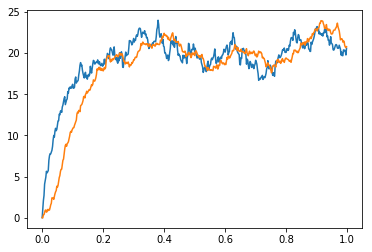

In [7]:
em = sim.EulerMaruyama(process=X, times=sim.xtimes(start=0., stop=1., step=.002))
df = sim.run(em)
plt.plot(df);

In [8]:
filtr = filtering.kalman.KalmanFilter(time=df.index[0], state_distr=N(mean=npu.col(0., 0.), cov=1000. * np.eye(2)), process=X)
state_observable = filtr.create_identity_observable(X)
first_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[1., 0.]]), X)
last_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[0., 1.]]), X)

In [9]:
import importlib
importlib.reload(filtering)

<module 'thalesians.tsa.filtering' from 'S:\\dev\\tsa\\src\\main\\python\\thalesians\\tsa\\filtering\\__init__.py'>

In [10]:
run_df = filtering.run(observable=last_observable, obss=1, df=df, return_df=True)

C:\Programs\Win64\Anaconda\V4.4.0_3.6\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in less_equal
  return umr_minimum(a, axis, None, out, keepdims)
C:\Programs\Win64\Anaconda\V4.4.0_3.6\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in greater_equal
  return umr_maximum(a, axis, None, out, keepdims)


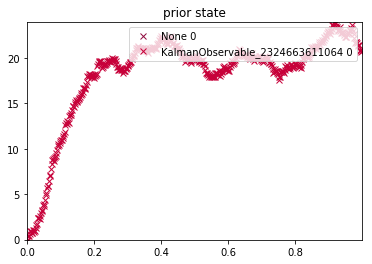

In [13]:
sp = visual.StatePlot(); sp.process_run_df(run_df)

C:\Programs\Win64\Anaconda\V4.4.0_3.6\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in less_equal
  return umr_minimum(a, axis, None, out, keepdims)
C:\Programs\Win64\Anaconda\V4.4.0_3.6\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in greater_equal
  return umr_maximum(a, axis, None, out, keepdims)


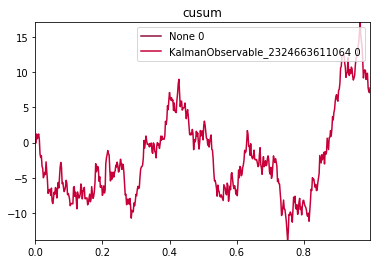

In [15]:
iqqp = visual.CUSUMPlot(); iqqp.process_run_df(run_df)

C:\Programs\Win64\Anaconda\V4.4.0_3.6\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in less_equal
  return umr_minimum(a, axis, None, out, keepdims)
C:\Programs\Win64\Anaconda\V4.4.0_3.6\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in greater_equal
  return umr_maximum(a, axis, None, out, keepdims)


In [85]:
for i in run_df.index:
    time = run_df.iloc[i]['time']
    accepted = run_df.iloc[i]['accepted']
    obs_mean = run_df.iloc[i]['obs_mean']
    obs_cov = run_df.iloc[i]['obs_cov']
    predicted_obs_mean = run_df.iloc[i]['predicted_obs_mean']
    predicted_obs_cov = run_df.iloc[i]['predicted_obs_cov']
    innov_mean = run_df.iloc[i]['innov_mean']
    innov_cov = run_df.iloc[i]['innov_cov']
    prior_state_mean = run_df.iloc[i]['prior_state_mean']
    prior_state_cov = run_df.iloc[i]['prior_state_cov']
    posterior_state_mean = run_df.iloc[i]['posterior_state_mean']
    posterior_state_cov = run_df.iloc[i]['posterior_state_cov']
    log_likelihood = run_df.iloc[i]['log_likelihood']
    

In [ ]:
ts, priors, posteriors, prior_values, posterior_values = [], [], [], [], []
for i, t in enumerate(df.index):
    ts.append(t)
    priors.append(state_observable.predict(t))
    prior_values.append(priors[-1].distr.mean.flatten())
    process_value = df.iloc[i].values
    last_observable.observe(N(process_value[-1], 0.), t)
    posteriors.append(state_observable.predict(t))
    posterior_values.append(posteriors[-1].distr.mean.flatten())
priors_df = pd.DataFrame(data=priors, index=ts)
posteriors_df = pd.DataFrame(data=posteriors, index=ts)
prior_values_df = pd.DataFrame(data=prior_values, index=ts)
posterior_values_df = pd.DataFrame(data=posterior_values, index=ts)

In [ ]:
plt.plot(posterior_values_df);

In [ ]:
plt.plot(df);